## CS 2064: Timothy Kim

### Data Science Research questions
###### 1. How does the rarity of fishes in Animal Crossing: New Horizons correlate to their selling price?
   - Public API for Animal Crossing data: https://acnhapi.com/v1/fish/

###### 2. What is the correlation between Shohei Ohtani's strikeouts and home runs in his 2021 MVP season?
   - Baseball statistics for Shohei's 2021 season: https://www.baseball-reference.com/players/o/ohtansh01.shtml

###### 3. What is the state with the most cancer deaths between 2007-2013? What is the rate of cancer deaths compared to the state's population?
   - CORGIS Dataset for Cancer Deaths: https://corgis-edu.github.io/corgis/csv/cancer/

In [119]:
'''Imports and Utility Functions'''
import requests
import json
from pprint import pprint
from bs4 import BeautifulSoup
import cancer
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
''' Public API: your findings '''
api = "https://acnhapi.com/v1/fish/" #this is the API that we will be extracting from

#these two lines will scrape the API
response = requests.get(api)
data = json.loads(response.text)

#these variables will symbolize the number of fish in each rarity level
#there are four rarities (common, uncommon, rare, ultra-rare)
common_count = 0
uncommon_count = 0
rare_count = 0
ultra_rare_count = 0

#these variables will symbolize the average selling price of a fish in each rarity level
common_price = 0
uncommon_price = 0
rare_price = 0
ultra_rare_price = 0


for fish_id, fish_data in data.items():
    fish_rarity = fish_data["availability"]["rarity"] #this will look through every fish's rarity
    fish_price = fish_data["price"] #this will look through the selling price of every fish
    
    if fish_data["availability"]["rarity"] == "Common": #if a fish is common rarity
        common_count += 1 #adds a common fish in the counter
        common_price += fish_data["price"] #adds the price of the fish to the price variable for a big sum
        
    #the rest of these elif statements follow the same thing, but for each rarity level
    elif fish_data["availability"]["rarity"] == "Uncommon": #if a fish is uncommon
        uncommon_count += 1
        uncommon_price += fish_data["price"]
    elif fish_data["availability"]["rarity"] == "Rare": #if a fish is rare
        rare_count += 1
        rare_price += fish_data["price"]
    elif fish_data["availability"]["rarity"] == "Ultra-rare": #if a fish is ultra-rare
        ultra_rare_count += 1
        ultra_rare_price += fish_data["price"]

#These are the statements that will explain everything and print it out.
#Average selling price will be determined by adding up the sum of all fishes in each rarity level and dividing it by the number of fish in that rarity level.
print("In the video game Animal Crossing: New Horizons, you as a player can go fishing.")
print("You can sell your fishes that you catch in a store for some money.")
print("Depending on the rarity of the fish, the fish will sell for a higher price.")
print()
print("On average, " + str(common_count) + " fish with the Common rarity sold for " + "{:.2f}".format(common_price / common_count) + " bells. (Bells are the currency in Animal Crossing)")
print("On average, " + str(uncommon_count) + " fish with the Uncommon rarity sold for " + str(uncommon_price / uncommon_count) + " bells.")
print("On average, " + str(rare_count) + " fish with the Rare rarity sold for " + str(rare_price / rare_count) + " bells.")
print("On average, " + str(ultra_rare_count) + " fish with the Ultra-rare rarity sold for " + str(ultra_rare_price / ultra_rare_count) + " bells.")
print()
print("As the rarity of fishes get higher (although the sample size may shrink), fishes tend to sell for a higher price.")

In the video game Animal Crossing: New Horizons, you as a player can go fishing.
You can sell your fishes that you catch in a store for some money.
Depending on the rarity of the fish, the fish will sell for a higher price.

On average, 41 fish with the Common rarity sold for 742.6829268292682 bells. (Bells are the currency in Animal Crossing)
On average, 21 fish with the Uncommon rarity sold for 3721.4285714285716 bells.
On average, 13 fish with the Rare rarity sold for 8923.076923076924 bells.
On average, 5 fish with the Ultra-rare rarity sold for 15000.0 bells.

As the rarity of fishes get higher (although the sample size may shrink), fishes tend to sell for a higher price.


In [121]:
''' Web Scraping: your findings '''

#these lines will scrape through Shohei Ohtani's Baseball Reference page
page = requests.get("https://www.baseball-reference.com/players/o/ohtansh01.shtml")
soup = BeautifulSoup(page.text, 'html.parser')

batting_table = soup.find('table', {'id': 'batting_standard'}) #looks through the batting_standard table
rows = batting_table.find_all('tr')
header = rows[0].find_all('th')
data = rows[rows.index(next(filter(lambda x: x.find('th').get_text() == '2021', rows)))].find_all('td') #finds the row of the 2021 season
home_runs = data[10].get_text() #gets the number of home runs (column) from the 2021 season (row)
strikeouts = data[15].get_text() #gets the number of strikeouts (column) from the 2021 season (row)

#These print statements will explain everything in a greater context.
print("Shohei Ohtani made history, being both a pitcher and a designated hitter, and won the 2021 MLB MVP unanimously.")
print("Ohtani is a hitter who hits for power, and power hitters tend to swing more, leading to more strikeouts.")
print("We will see the correlation between home runs and strikeouts for Shohei's MVP season.")
print()
print(f"Shohei Ohtani had {home_runs} home runs in his 2021 MVP season.")
print(f"Shohei Ohtani swung for {strikeouts} strikeouts as well.")
print(f"So for every homer that Ohtani hit, he had approximately {round(int(strikeouts) / int(home_runs), 2)} strikeouts.")
print()
print("There seems to be a direct positive correlation: the more home runs he hit, the more strikeouts he had as well.")
print(f"It seemed that Shohei had to make the compromise of having a lot of strikeouts if he wanted to hit {home_runs} home runs.")

Shohei Ohtani made history, being both a pitcher and a designated hitter, and won the 2021 MLB MVP unanimously.
Ohtani is a hitter who hits for power, and power hitters tend to swing more, leading to more strikeouts.
We will see the correlation between home runs and strikeouts for Shohei's MVP season.

Shohei Ohtani had 46 home runs in his 2021 MVP season.
Shohei Ohtani swung for 189 strikeouts as well.
So for every homer that Ohtani hit, he had approximately 4.11 strikeouts.

There seems to be a direct positive correlation: the more home runs he hit, the more strikeouts he had as well.
It seemed that Shohei had to make the compromise of having a lot of strikeouts if he wanted to hit 46 home runs.


In [122]:
'''Direct Download: your findings'''
#This will read through a file that I downloaded called cancer.csv, from the CORGIS dataset.
df = pd.read_csv('cancer.csv')

#these two lines will have the two variables contain the "Total.Number" and "State" columns
total_num = df['Total.Number']
state_name = df['State']

#these variables are called. in the future they will contain all the information needed
most_deaths = 0 #will hold the state that has the most cancer deaths
cancer_state = '' #will hold the state name
state_count = 0 #will cycle through the states and go down the list
state_population = 0 #will hold the state with the most deaths due to cancer's full population

for i in total_num: #looks through every state
    if i > most_deaths: #if a state's cancer deaths is greater than the previous state
        most_deaths = i #replace most_deaths with i
        cancer_state = df.loc[state_count, 'State'] #replaces the previous state with the one being scanned
        state_population = df.loc[state_count, 'Total.Population'] #replaces populaition
    state_count += 1 #cycles through states

#These print statements will portray everything needed to know.
print(f"The state in the US that had the most deaths due to cancer is {cancer_state}, with {int(most_deaths)} deaths.")
print(f"This is most likely because California has the most people in the US, with {int(state_population)} people.")
print(f"The rate of cancer deaths compared to its population is {round(((most_deaths/state_population) * 10000), 2)} per ten thousand people.")


The state in the US that had the most deaths due to cancer is California, with 393980 deaths.
This is most likely because California has the most people in the US, with 261135696 people.
The rate of cancer deaths compared to its population is 15.09 per ten thousand people.


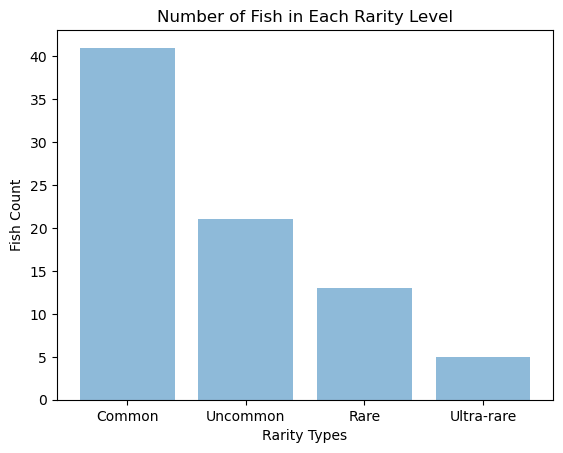

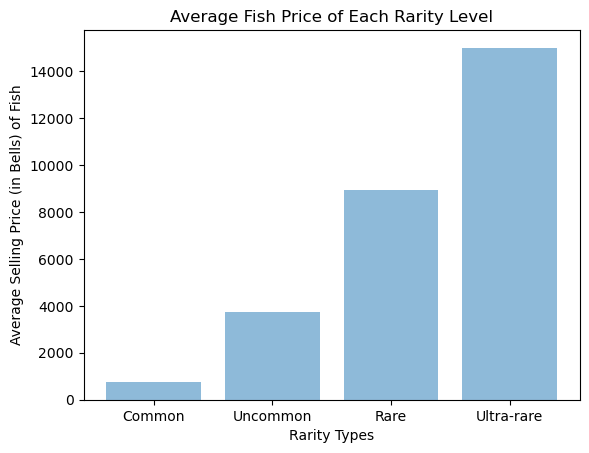

In [123]:
''' Visualization: '''
''' OLD CODE OLD CODE OLD CODE (from the Public API Animal Crossing: New Horizons code) '''
api = "https://acnhapi.com/v1/fish/" #this is the API that we will be extracting from

#these two lines will scrape the API
response = requests.get(api)
data = json.loads(response.text)

#these variables will symbolize the number of fish in each rarity level
#there are four rarities (common, uncommon, rare, ultra-rare)
common_count = 0
uncommon_count = 0
rare_count = 0
ultra_rare_count = 0

#these variables will symbolize the average selling price of a fish in each rarity level
common_price = 0
uncommon_price = 0
rare_price = 0
ultra_rare_price = 0


for fish_id, fish_data in data.items():
    fish_rarity = fish_data["availability"]["rarity"] #this will look through every fish's rarity
    fish_price = fish_data["price"] #this will look through the selling price of every fish
    
    if fish_data["availability"]["rarity"] == "Common": #if a fish is common rarity
        common_count += 1 #adds a common fish in the counter
        common_price += fish_data["price"] #adds the price of the fish to the price variable for a big sum
        
    #the rest of these elif statements follow the same thing, but for each rarity level
    elif fish_data["availability"]["rarity"] == "Uncommon": #if a fish is uncommon
        uncommon_count += 1
        uncommon_price += fish_data["price"]
    elif fish_data["availability"]["rarity"] == "Rare": #if a fish is rare
        rare_count += 1
        rare_price += fish_data["price"]
    elif fish_data["availability"]["rarity"] == "Ultra-rare": #if a fish is ultra-rare
        ultra_rare_count += 1
        ultra_rare_price += fish_data["price"]


''' NEW CODE NEW CODE NEW CODE '''
#These variables will represent the average selling price of each fish in every rarity level
common_avg_price = common_price / common_count
uncommon_avg_price = uncommon_price / uncommon_count
rare_avg_price = rare_price / rare_count
ultra_rare_avg_price = ultra_rare_price / ultra_rare_count

#This determines the categories in the x-axes of every graph, as well as set the numbers to them on the y-axes.
rarity_levels = ['Common', 'Uncommon', 'Rare', 'Ultra-rare']
fish_counts = [common_count, uncommon_count, rare_count, ultra_rare_count]
fish_avg_prices = [common_avg_price, uncommon_avg_price, rare_avg_price, ultra_rare_avg_price]
x_pos = np.arange(len(rarity_levels))

#This will plot the first graph, which is number of fish in each rarity level.
plt.bar(x_pos, fish_counts, align='center', alpha=0.5)
plt.xticks(x_pos, rarity_levels)
plt.xlabel('Rarity Types') #x-axis label
plt.ylabel('Fish Count') #y-axis label
plt.title('Number of Fish in Each Rarity Level') #title label
plt.show() #shows the plot

#This will plot the second graph, which is average selling price of fish in each rarity level.
plt.bar(x_pos, fish_avg_prices, align='center', alpha=0.5)
plt.xticks(x_pos, rarity_levels)
plt.xlabel('Rarity Types')
plt.ylabel('Average Selling Price (in Bells) of Fish')
plt.title('Average Fish Price of Each Rarity Level')
plt.show()

###### Visual Description:
#### There are two graphs above, for fishes and their prices in Animal Crossing: New Horizons.
- The first graph represents the number of fish for each rarity level in Animal Crossing: New Horizon. The common rarity has the most fish, and then uncommon, rare, and ultra-rare.
- The second graph represents the average fish price for each rarity level in Animal Crossing. The common rarity is the cheapest average price, and then uncommon, rare, and ultra-rare.

###### Visual Discussion:
#### What is the significance of these graphs?
- Clearly, as the rarity level becomes more rare, or "better," there are less of those fishes in that level.
- In the same token, as the rarity level becomes "better," the fish in that rarity level sell for a higher price.
- If all of the rarity types were represented by numbers (1-4), there is a clear direct relationship for both graphs. As the rarity goes up, the number of fish goes down, and the average selling price goes up.